In [1]:
import numpy as np
import utilities as ut

In [126]:
dataset = 'UJI'
version = 'v4'
missing_value = -100
block_grid_size = 4
X_test_ori, Y_test_ori,T_test_ori, X_train_ori, Y_train_ori, T_train_ori = ut.get_data(dataset, fill_invalid_with=-100)

X_train, Y_train, T_train = ut.remove_strange_data(X_train_ori, Y_train_ori, T_train_ori, predetermined_value=missing_value)
X_test, Y_test, T_test = ut.remove_strange_data(X_test_ori, Y_test_ori, T_test_ori, predetermined_value=missing_value)

Number of removed rows: 76
Number of removed rows: 0


In [128]:
if dataset == 'UJI':
    remapper = ut.CoordinateRemapper(ref_point=(1.00,1.00))
    Y_train[:,-3:] = remapper.fit_transform(Y_train[:, -3:])
    Y_test[:,-3:] = remapper.transform(Y_test[:, -3:])
    time_step = 10
else:
    time_step = 5

In [129]:
builder = ut.SequentialBlockBuilder(grid_size=block_grid_size, time_steps=time_step)

# Step 1: Add block IDs to Y
Y_with_block = builder.fit(Y_train)  # returns Y with shape [N, D+1]

# Step 2: Generate sequences
X_train_seq, Y_train_seq = builder.transform_with_padding(X_train, Y_with_block, T_train)
# X_train_seq, Y_train_seq = builder.transform(X_train, Y_with_block, T_train)

# Step 3: Get block metadata
block_info = builder.get_block_info()  # block_id → x, y

In [130]:
# Step 1: Assign block IDs to test set
Y_test_blocked = builder.assign_blocks_to_new_data(Y_test)

In [131]:
# Step 2: Create sequences using the same logic
# X_test_seq, Y_test_seq = builder.transform_with_padding(X_test, Y_test_blocked, T_test)
X_test_seq, Y_test_seq = builder.test_transform( X_test, Y_test_blocked, T_test, X_train, Y_with_block)

In [133]:
X_test_row = X_test
Y_test_row = Y_test_blocked
X_train_row = X_train
Y_train_row = Y_with_block

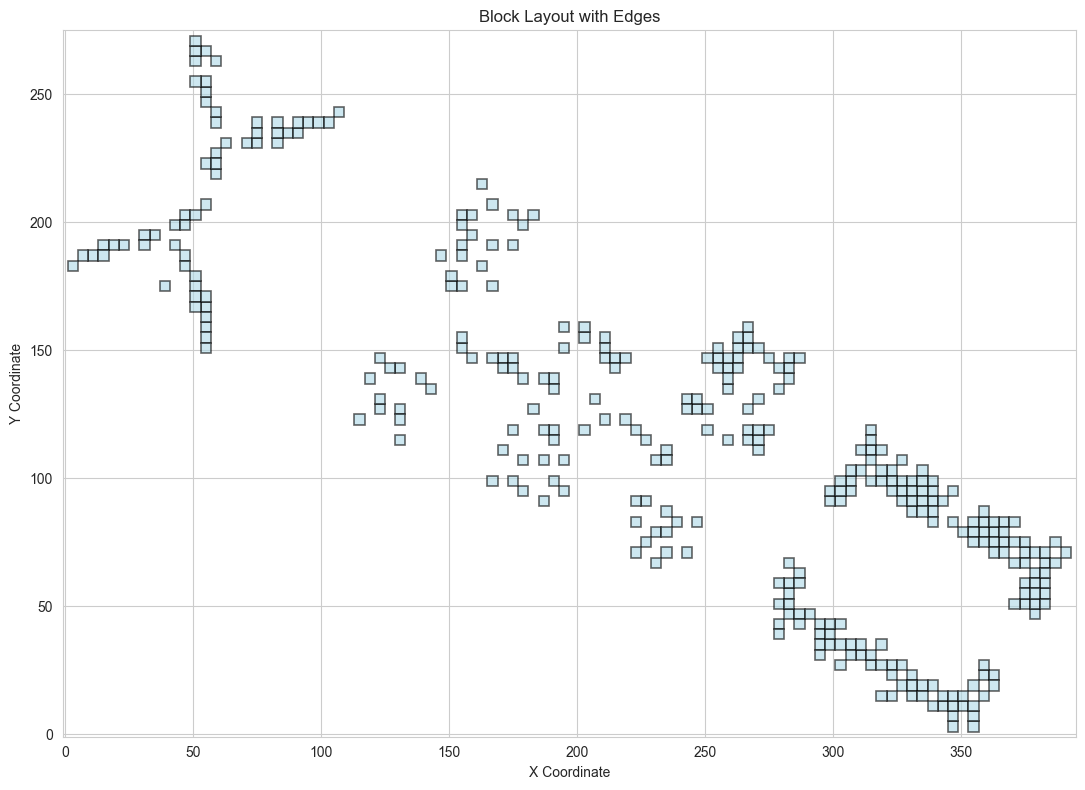

In [135]:
ut.visualize_block_boxes(block_info, grid_size=block_grid_size, annotate=False)

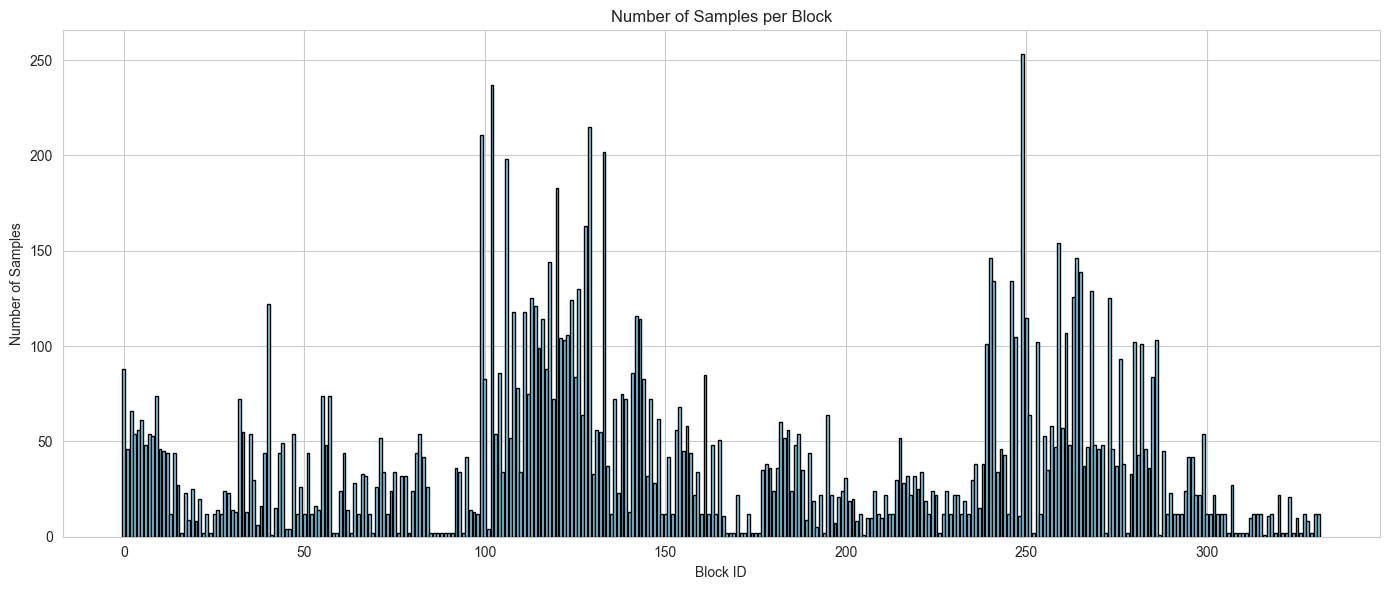

In [136]:
ut.plot_block_sample_distribution(Y_train_seq, sort_by_count=False)